   # IBM Data Science Capstone Project: Wine Quality

### Completed by Kathryn Dark

This Jupyter Notebook will be used to complete the Capstone Project for the IBM Data Science Certificate

In [1]:
import pandas as pd
import numpy as np

In [2]:
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Section 1: Introduction/Business Problem
The purpose of this report is to predict the quality of red wine based on measures of eleven different variables in the wine.  The target audience for this report is Vineyards, Winemakers and Restaurants. This report will determine which variables of wine have a stronger impact on its quality rating. This report will also use Machine Learning Algorithms to predict whether a wine will be rated ‘good’ (a quality rating 7 and above) or ‘bad’ (quality rating less than 7) based on its feature variables.  With this report, a vineyard can adjust different variables of its wine production which can increase their quality of wine. An increase in their quality of wine will lead to more sales and profit. Restaurants can use this machine learning algorithm to determine if a wine will have a good quality rating or a bad quality rating.  They can then pick the best wines to sell to their guests.  

## Section 2: Data
The dataset used for this Capstone revolves around red wine.  This dataset is related to red variants of the Portuguese "Vinho Verde" wine.

The data includes eleven variables that can be tested in the wine:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily) 

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste 

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter

5 - chlorides: the amount of salt in the wine 

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; 

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial 

11 - alcohol.


The data also includes a 12th column, which is Quality, a score between 0 and 10. The purpose of this report is to determine if the quality of a wine can be predicted based on the eleven qualities listed above. 

Relevant publication
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [76]:
# The code was removed by Watson Studio for sharing.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Section 3: Methodology

### Exploratory Data Analysis

In [5]:
#check how many datapoints we have
df.shape

(1599, 12)

This dataset consists of 1599 rows and 12 columns.

In [77]:
#check the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see here that every column except the quality column is of type float64. The quality column is of type in64 since the quality is a number given from 0 to 10. We can also see here that there are 1599 entries and all 12 columns have 1599 non-null entries, which means the dataframe is not missing any values.

### Determining Correlation
In this next section, we will use two different methods to quickly see if any of our measures of wine determine the quality. First, we can order the different attributes of wine and their correlation with quality from highest to lowest. Attributes with a correlation coefficient close to +1 and -1 show the highest correlation. 

In [78]:
df.corr()['quality'].sort_values(ascending=False).drop('quality')


alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Here we can see that Alcohol, Volatile Acidity, Sulphates and Citric Acid have the strongest correlation coefficients to determine the quality rating of the wine. 

Our second method of determining correlation is visual with a heatmap.

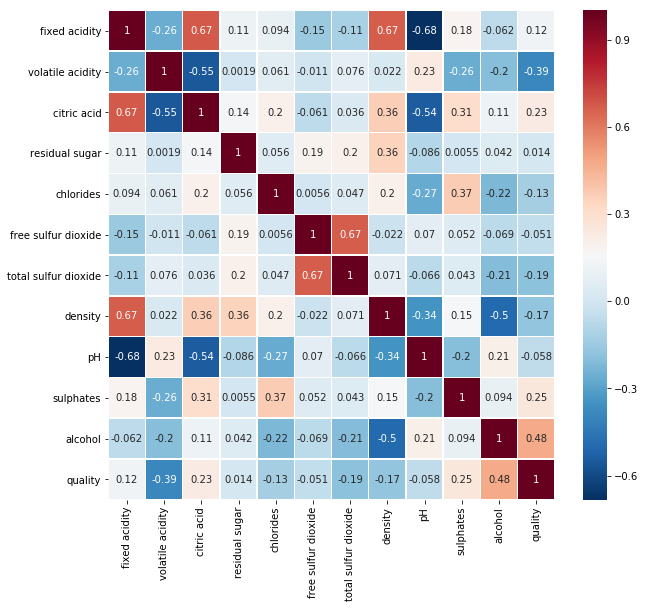

In [79]:
#visualize correlation with a heatmap
pearsoncorr = df.corr(method='pearson')
plt.figure(figsize=(10,9))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,)

### Data Visualization: Scatterplots

Now we will compare each measured variable to quality to determine if there are variables that are more strongly correlated to quality.  We will use scatter plots to begin. The predictor or independent variable will be on the x-axis, and the target or dependent variable (quality) will be on the y-axis. 

<function matplotlib.pyplot.show(*args, **kw)>

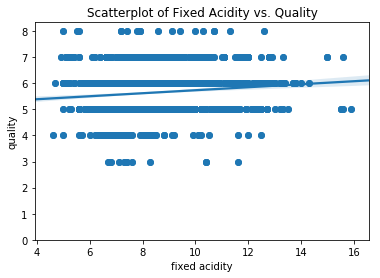

In [80]:
y=df['quality']
x=df[['fixed acidity']]
plt.scatter(x,y)
plt.title("Scatterplot of Fixed Acidity vs. Quality")
plt.xlabel("Fixed Acidity")
plt.ylabel("Quality")
sns.regplot(x='fixed acidity', y='quality', data=df)
plt.ylim(0,)

plt.show



In [10]:
#line of best fit
y=df['quality']
x=df['fixed acidity']
fit = np.polyfit(x, y, deg=1)
fit

array([0.05753864, 5.15732187])

The line of best fit for the scatter plot "Fixed Acidity vs. Quality" has a slope of 0.057 and a y-intercept of 5.15. y=0.057(x) + 5.15

In [11]:
lm=LinearRegression()
y=df['quality']
x=df[['fixed acidity']]
lm.fit(x,y)
lm.score(x,y)


0.015388811647710552

The R-Squared value, also known as the coefficient of determination, for the line of best fit for the scatter plot "Fixed Acidity vs. Quality" is 0.01538.  The R-Squared measures how close the data is to the fitted regression line. 

<function matplotlib.pyplot.show(*args, **kw)>

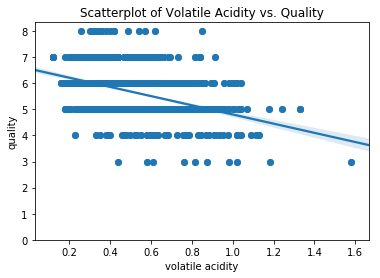

In [12]:
y=df['quality']
x2=df[['volatile acidity']]
plt.scatter(x2,y)
plt.title("Scatterplot of Volatile Acidity vs. Quality")
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality")
sns.regplot(x='volatile acidity', y='quality', data=df)
plt.ylim(0,)

plt.show

In [13]:
#line of best fit
y=df['quality']
x2=df['volatile acidity']
fit = np.polyfit(x2, y, deg=1)
fit

array([-1.76143778,  6.56574551])

The line of best fit for the scatterplot Volatile Acidity vs. Quality has a slope of -1.76 and a y intercept of 6.56. y=-1.76x + 6.56

In [14]:
lm=LinearRegression()
y=df['quality']
x2=df[['volatile acidity']]
lm.fit(x2,y)
lm.score(x2,y)

0.1525353797247485

The R-Squared value for the line of best fit is 0.15.

<function matplotlib.pyplot.show(*args, **kw)>

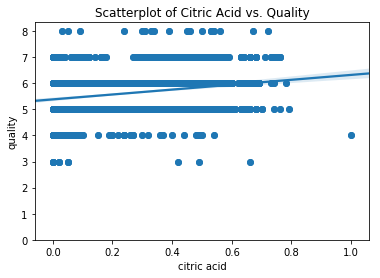

In [15]:
y=df['quality']
x3=df[['citric acid']]
plt.scatter(x3,y)
plt.title("Scatterplot of Citric Acid vs. Quality")
plt.xlabel("Citric Acid")
plt.ylabel("Quality")
sns.regplot(x='citric acid', y='quality', data=df)
plt.ylim(0,)

plt.show

In [16]:
#line of best fit
y=df['quality']
x3=df['citric acid']
fit = np.polyfit(x3, y, deg=1)
fit

array([0.93845204, 5.3817249 ])

The line of best fit for the scatterplot Citric Acid vs. Quality has a slope of 0.938 and a y-intercept of 5.38. y=0.938x + 5.38

In [17]:
lm=LinearRegression()
y=df['quality']
x3=df[['citric acid']]
lm.fit(x3,y)
lm.score(x3,y)

0.05124451523867202

The R-Squared value for the line of best fit is 0.05.

<function matplotlib.pyplot.show(*args, **kw)>

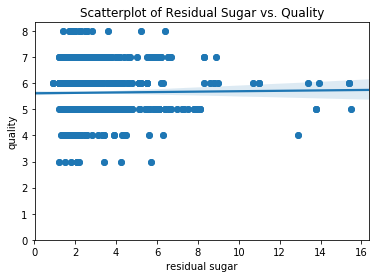

In [18]:
y=df['quality']
x4=df[['residual sugar']]
plt.scatter(x4,y)
plt.title("Scatterplot of Residual Sugar vs. Quality")
plt.xlabel("Residual Sugar")
plt.ylabel("Quality")
sns.regplot(x='residual sugar', y='quality', data=df)
plt.ylim(0,)

plt.show

In [19]:
#line of best fit
y=df['quality']
x4=df['residual sugar']
fit = np.polyfit(x4, y, deg=1)
fit

array([0.00786512, 5.61605451])

The line of best fit for the Scatterplot of Residual Sugar vs. Quality has a slope of 0.0078 and a y-intercept of 5.616. y=0.0078x + 5.616.

In [20]:
lm=LinearRegression()
y=df['quality']
x4=df[['residual sugar']]
lm.fit(x4,y)
lm.score(x4,y)

0.00018855786403915165

The R-Squared value for the line of best fit for Residual Sugar vs. Quality is 0.000188.

<function matplotlib.pyplot.show(*args, **kw)>

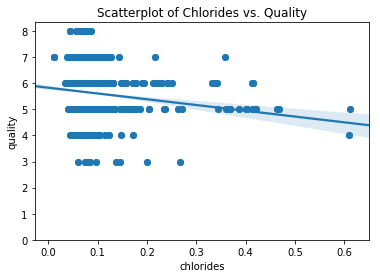

In [21]:
y=df['quality']
x5=df[['chlorides']]
plt.scatter(x5,y)
plt.title("Scatterplot of Chlorides vs. Quality")
plt.xlabel("Chlorides")
plt.ylabel("Quality")
sns.regplot(x='chlorides', y='quality', data=df)
plt.ylim(0,)

plt.show

In [22]:
#line of best fit
y=df['quality']
x5=df['chlorides']
fit = np.polyfit(x5, y, deg=1)
fit

array([-2.21184172,  5.82948466])

The line of best fit for the Scatterplot of Chlorides vs. Quality has a slope of -2.21 and a y-intercept of 5.829. y=-2.21x + 5.829.

In [23]:
lm=LinearRegression()
y=df['quality']
x5=df[['chlorides']]
lm.fit(x5,y)
lm.score(x5,y)

0.0166169011930003

The R-Squared value for the line of best fit for Chlorides vs. Quality is 0.0166.

<function matplotlib.pyplot.show(*args, **kw)>

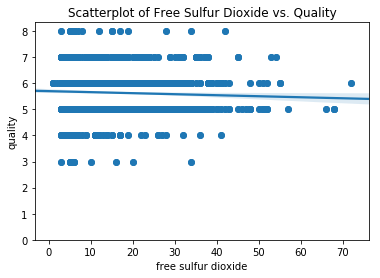

In [24]:
y=df['quality']
x6=df[['free sulfur dioxide']]
plt.scatter(x6,y)
plt.title("Scatterplot of Free Sulfur Dioxide vs. Quality")
plt.xlabel("Free Sulfur Dioxide")
plt.ylabel("Quality")
sns.regplot(x='free sulfur dioxide', y='quality', data=df)
plt.ylim(0,)

plt.show

In [25]:
#line of best fit
y=df['quality']
x6=df['free sulfur dioxide']
fit = np.polyfit(x6, y, deg=1)
fit

array([-3.91086710e-03,  5.69810722e+00])

The line of best fit for the scatterplot Free Sulfur Dioxide vs. Quality has a slope of -3.91e-03 and a y-intercept of 5.69. y=-3.91e-03x + 5.69.

In [26]:
lm=LinearRegression()
y=df['quality']
x6=df[['free sulfur dioxide']]
lm.fit(x6,y)
lm.score(x6,y)

0.00256603613553541

The R-Squared value for the line of best fit for the Scatterplot Free Sulphur Dioxide vs. Quality is 0.0025.

<function matplotlib.pyplot.show(*args, **kw)>

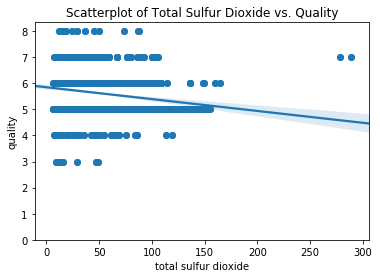

In [27]:
y=df['quality']
x7=df[['total sulfur dioxide']]
plt.scatter(x7,y)
plt.title("Scatterplot of Total Sulfur Dioxide vs. Quality")
plt.xlabel("Total Sulfur Dioxide")
plt.ylabel("Quality")
sns.regplot(x='total sulfur dioxide', y='quality', data=df)
plt.ylim(0,)

plt.show

In [28]:
#line of best fit
y=df['quality']
x7=df['total sulfur dioxide']
fit = np.polyfit(x7, y, deg=1)
fit

array([-4.54415146e-03,  5.84717920e+00])

The line of best fit for the scatterplot Total Sulfur Dioxide vs. Quality has a slope of -4.544e-03 and a y-intercept of 5.847. y=-4.544e-03x + 5.847.

In [29]:
lm=LinearRegression()
y=df['quality']
x7=df[['total sulfur dioxide']]
lm.fit(x7,y)
lm.score(x7,y)

0.03426211696068793

The R-Squared value for the line of best fit for the scatterplot Total Sulfur Dioxide vs. Quality is 0.034.

<function matplotlib.pyplot.show(*args, **kw)>

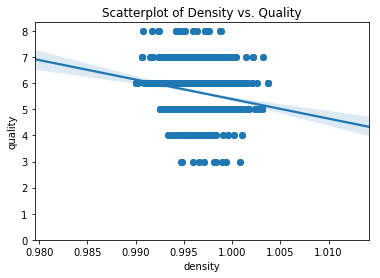

In [30]:
y=df['quality']
x8=df[['density']]
plt.scatter(x8,y)
plt.title("Scatterplot of Density vs. Quality")
plt.xlabel("Density")
plt.ylabel("Quality")
sns.regplot(x='density', y='quality', data=df)
plt.ylim(0,)

plt.show

In [31]:
#line of best fit
y=df['quality']
x8=df['density']
fit = np.polyfit(x8, y, deg=1)
fit

array([-74.8460136 ,  80.23853802])

In [32]:
lm=LinearRegression()
y=df['quality']
x8=df[['density']]
lm.fit(x8,y)
lm.score(x8,y)

0.030596736248323153

The R-Squared value for the line of best fit for the Scatterplot Density vs. Quality is 0.03.

<function matplotlib.pyplot.show(*args, **kw)>

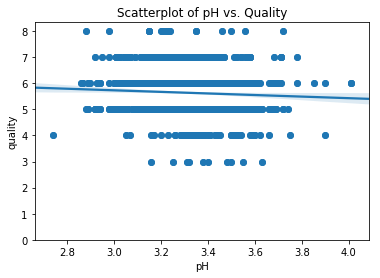

In [33]:
y=df['quality']
x9=df[['pH']]
plt.scatter(x9,y)
plt.title("Scatterplot of pH vs. Quality")
plt.xlabel("pH")
plt.ylabel("Quality")
sns.regplot(x='pH', y='quality', data=df)
plt.ylim(0,)

plt.show

In [34]:
#line of best fit
y=df['quality']
x9=df['pH']
fit = np.polyfit(x9, y, deg=1)
fit

array([-0.30198313,  6.63592283])

The line of best fit for the scatterplot pH vs. Quality has a slope of -0.302 and a y-intercept of 6.636. y=-0.302x + 6.636.

In [35]:
lm=LinearRegression()
y=df['quality']
x9=df[['pH']]
lm.fit(x9,y)
lm.score(x9,y)

0.0033329135305089075

The R-Squared value for the line of best fit for the scatterplot pH vs. Quality is 0.0033.

<function matplotlib.pyplot.show(*args, **kw)>

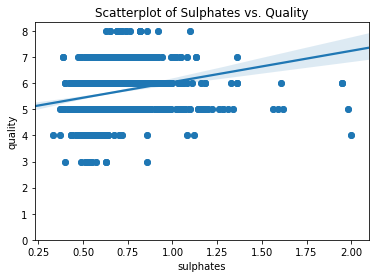

In [36]:
y=df['quality']
x10=df[['sulphates']]
plt.scatter(x10,y)
plt.title("Scatterplot of Sulphates vs. Quality")
plt.xlabel("Sulphates")
plt.ylabel("Quality")
sns.regplot(x='sulphates', y='quality', data=df)
plt.ylim(0,)

plt.show

In [37]:
#line of best fit
y=df['quality']
x10=df['sulphates']
fit = np.polyfit(x10, y, deg=1)
fit

array([1.19771232, 4.84774953])

The line of best fit for the scatterplot of Sulphates vs. Quality has a slope of 1.197 and a y-intercept of 4.847. y=1.197x + 4.847.

In [38]:
lm=LinearRegression()
y=df['quality']
x10=df[['sulphates']]
lm.fit(x10,y)
lm.score(x10,y)

0.06320049136455663

The R-Squared value for the line of best fit for the Scatterplot of Sulphates vs. Quality is 0.063.

<function matplotlib.pyplot.show(*args, **kw)>

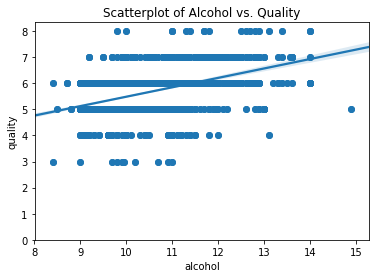

In [39]:
y=df['quality']
x11=df[['alcohol']]
plt.scatter(x11,y)
plt.title("Scatterplot of Alcohol vs. Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
sns.regplot(x='alcohol', y='quality', data=df)
plt.ylim(0,)

plt.show

In [40]:
#line of best fit
y=df['quality']
x11=df['alcohol']
fit = np.polyfit(x11, y, deg=1)
fit

array([0.36084177, 1.87497489])

The line of best fit for the scatterplot Alcohol vs. Quality has a slope of 0.36 and a y-intercept of 1.874. y=0.36x + 1.874.

In [41]:
lm=LinearRegression()
y=df['quality']
x11=df[['alcohol']]
lm.fit(x11,y)
lm.score(x11,y)

0.22673436811275482

The R-Squared value for the line of best fit for the scatterplot Alcohol vs. Quality is 0.2267.

### Data Visualization: Box Plots

In this second visualization method, we will use boxplots to see the effect of outliers. 

Text(0.5, 1.0, 'Boxplot of Fixed Acidity vs. Quality')

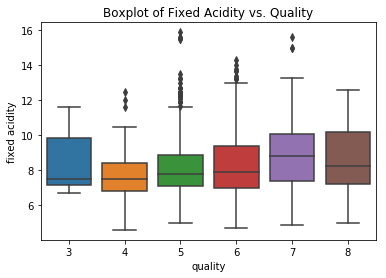

In [42]:
sns.boxplot(x='quality', y='fixed acidity', data=df).set_title("Boxplot of Fixed Acidity vs. Quality")

Text(0.5, 1.0, 'Boxplot of Volatile Acidity vs. Quality')

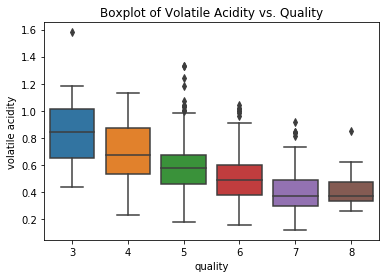

In [81]:
sns.boxplot(x='quality', y='volatile acidity', data=df).set_title("Boxplot of Volatile Acidity vs. Quality")

Text(0.5, 1.0, 'Boxplot of Citric Acid vs. Quality')

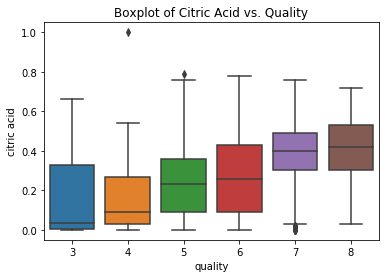

In [82]:
sns.boxplot(x='quality', y='citric acid', data=df).set_title("Boxplot of Citric Acid vs. Quality")

Text(0.5, 1.0, 'Boxplot of Residual Sugar vs. Quality')

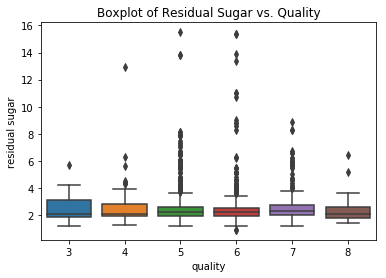

In [83]:
sns.boxplot(x='quality', y='residual sugar', data=df).set_title("Boxplot of Residual Sugar vs. Quality")

Text(0.5, 1.0, 'Boxplot of Chlorides vs. Quality')

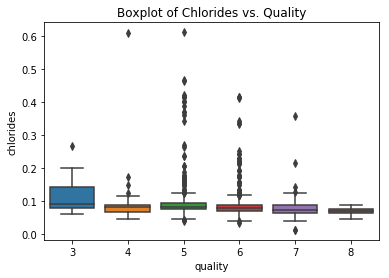

In [84]:
sns.boxplot(x='quality', y='chlorides', data=df).set_title("Boxplot of Chlorides vs. Quality")

Text(0.5, 1.0, 'Boxplot of Free Sulphur Dioxide vs. Quality')

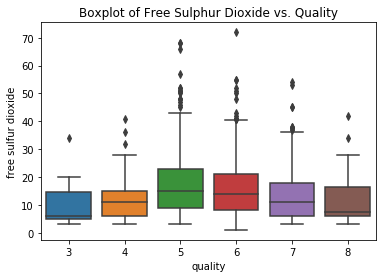

In [85]:
sns.boxplot(x='quality', y='free sulfur dioxide', data=df).set_title("Boxplot of Free Sulphur Dioxide vs. Quality")

Text(0.5, 1.0, 'Boxplot of Total Sulphur Dioxide vs. Quality')

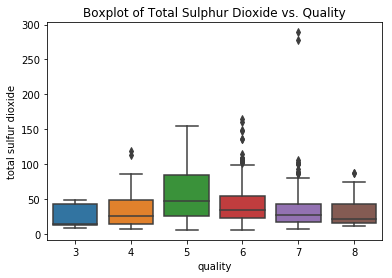

In [86]:
sns.boxplot(x='quality', y='total sulfur dioxide', data=df).set_title("Boxplot of Total Sulphur Dioxide vs. Quality")

Text(0.5, 1.0, 'Boxplot of Density vs. Quality')

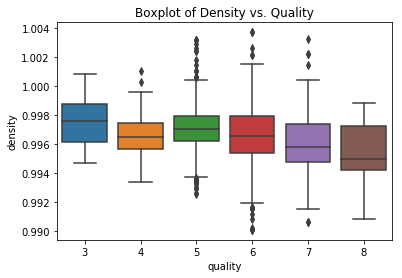

In [87]:
sns.boxplot(x='quality', y='density', data=df).set_title("Boxplot of Density vs. Quality")

Text(0.5, 1.0, 'Boxplot of pH vs. Quality')

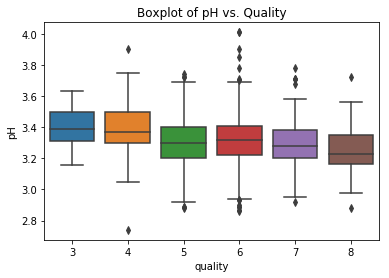

In [88]:
sns.boxplot(x='quality', y='pH', data=df).set_title("Boxplot of pH vs. Quality")

Text(0.5, 1.0, 'Boxplot of Sulphates vs. Quality')

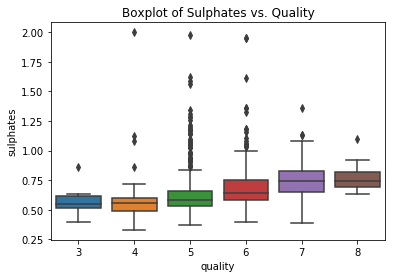

In [89]:
sns.boxplot(x='quality', y='sulphates', data=df).set_title("Boxplot of Sulphates vs. Quality")

Text(0.5, 1.0, 'Boxplot of Alcohol vs. Quality')

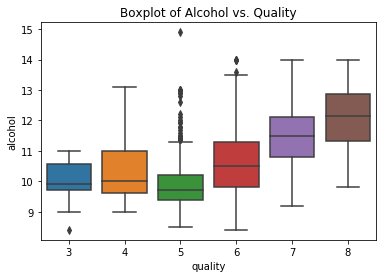

In [90]:
sns.boxplot(x='quality', y='alcohol', data=df).set_title("Boxplot of Alcohol vs. Quality")

### Preparing the Data for Machine Learning

First we will separate our data based on the Quality into bins. Wines rated 3-6 will be considered "bad" while wines rated 7-8 are "good".

In [53]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [54]:
#Now we want to assign 0 and 1 instead of 'bad' and 'good'
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_quality = LabelEncoder()

In [55]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [56]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

We have 1382 wines that are considered 'bad' and 217 wines that are considered 'good'.  This is a unbalanced dataset and we will fix that by scaling. 

In [57]:
#Now we seperate our dataset into the features, which is everything except the quality, and the target, which is the quality. 
x = df.drop('quality', axis = 1)
y = df['quality']

In [58]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [59]:
#Now we will scale the data because it is unbalanced- a lot more datapoints in the 0 'bad' bin than in the 1 'good' bin
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Now our data is ready to perform Machine Learning Algorithms!

### Machine Learning Algorithm 1: K-Nearest Neighbor (KNN)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [62]:
yhat = neigh.predict(X_test)
yhat[0:5]


array([0, 0, 0, 0, 0])

In [63]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))



Train set Accuracy:  0.9163408913213448
Test set Accuracy:  0.878125


In [64]:
#Finding the best value for K
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


array([0.890625, 0.871875, 0.865625, 0.878125, 0.875   , 0.884375,
       0.875   , 0.871875, 0.884375])

In [65]:
#K=1 has best accuracy
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [66]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [67]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.890625


In [68]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       273
           1       0.62      0.68      0.65        47

   micro avg       0.89      0.89      0.89       320
   macro avg       0.78      0.80      0.79       320
weighted avg       0.90      0.89      0.89       320



The K Nearest Neighbors Algorithm gives its highest accuracy of 89% when k=1.

### Machine Learning Algorithm 2: Logistic Regression

In [69]:
#model data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
#predict using test set
yhat = LR.predict(X_test)
yhat


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [71]:
#evaluate with jaccard index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)



0.875

In [72]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.875


In [73]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       273
           1       0.77      0.21      0.33        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.82      0.60      0.63       320
weighted avg       0.86      0.88      0.84       320



The Logistic Regression Algorithm gives an accuracy of 87.5%

## Section 4: Results

The goal of this report is to determine if a machine learning algorithm can be used in order to determine the quality rating of red wine given the eleven feature points.  With an 89.1% accuracy, the K-Nearest Neighbor machine learning algorithm can determine if a red wine will have a quality rating of 0 ‘bad’ or 1 ‘good’, given the eleven feature points.  

It was also determined that Alcohol (correlation coefficient 0.47), Volatile Acidity (correlation coefficient -0.39), Sulphates (correlation coefficient 0.25) and Citric Acid (correlation coefficient 0.23) have the strongest correlation coefficients to determine the quality rating of the wine. That means these features have the most impact on whether or not a wine is rated 0 ‘bad’ or 1 ‘good’.  Winemakers and Vineyards should focus on these four features as they have the strongest impact on the quality rating of red wine. 

From the data visualization tools one could see that volatile acidity level decreases as the quality rating increases.  Also the Alcohol vs. Quality boxplot shows that the quality rating increases as the alcohol level also increases.  A positive correlation was evident in the boxplot Sulphates vs. Quality and Citric Acid vs. Quality.  A positive correlation means that as the independent feature or variable increases, so does the target feature.  A negative correlation was evident in the boxplots Density vs. Quality and pH vs. Quality.  A negative correlation does not mean the two features are not correlated, it means that as the quality rating increases, the feature level decreases.  

In the case of this dataset, the boxplots were more valuable visual tools than the scatterplots because of the number of outliers.  The boxplots visually showed the immense number of outliers in the residual sugars, chlorides and sulphates vs. quality graphs.  These outliers are not immediately visually apparent in the scatterplots and affect the line of best fit as well as the R-squared value.  

The scatterplots however were useful for finding a line of best fit and a corresponding R-squared value. An R-squared value closer to 1 indicates that the line is a good fit for the data.  Here the R-squared values are quite small, and the closest value to 1 for the line of best fit was for the feature alcohol vs. quality, with an r-squared value of 0.2267.  The next highest R-squared feature, Volatile Acidity, has an R-squared value of 0.1525.  These two features have the strongest correlation to quality rating as well as the strongest R-squared values for predicting quality of wine.  


## Section 5: Discussion

Based on the data analysis, it is recommended to use the K-Nearest Neighbor Algorithm to determine if a new wine will have a quality rating of 0 ‘bad’ or 1 ‘good’.  The K-Nearest Neighbor Algorithm gives a result with 89.1% accuracy. 

Also, the four feature measures with the strongest impact on the quality rating of red wine were alcohol, volatile acidity, sulphates and citric acid.  All except volatile acidity had a positive correlation, meaning the quality rating was increased with an increase in those features.  The quality rating would increase with a decrease in volatile acidity.  Winemakers and vineyards should pay extra attention to these four features in order to increase their quality rating of red wine. 


## Section 6: Conclusion

In this analysis, the data was cleaned to determine correlation of eleven feature variables with the quality rating of red wine. Then three data visualization tools; a heatmap, scatterplots and boxplots; were used to visualize the correlation of the eleven feature variables with red wine quality.  Lines of best fit and R-squared values were determined from the scatterplots.  The data was then prepped for machine learning by binning the target variable to 0: any quality rating below 7, and 1: any quality rating 7 and above.  The data was unbalanced (much more data in the 0 ‘bad’ category), so scaling was applied.  The data was separated into feature set (every column except quality) and target set (only the quality column). The data was split into training and test sets, with a testing size of 20% and a training size of 80%.  Two machine learning algorithms were modeled, trained and tested for accuracy on the data: K-Nearest Neighbor and Logistic Regression. 


In conclusion, four features of wine have the strongest impact on its quality rating: alcohol, volatile acidity, sulphates and citric acid.  The K-Nearest Neighbors machine learning algorithm should be used to determine if a new wine will have a good rating (7 and above) or a bad rating (below 7), with a 89.1% accuracy.  


This report was prepared by Kathryn Dark for the Capstone IBM Data Science Certificate. 